In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Import Data

In [44]:
data = pd.read_csv("/content/ecommerceDataset.csv")
col_names = ['label','text']
data.columns = col_names
data.head()

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50424 non-null  object
 1   text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [46]:
data.shape

(50424, 2)

In [47]:
data.isna().sum()

label    0
text     1
dtype: int64

In [48]:
data = data.dropna()

Splitting Train & Test data

In [49]:
# Create Feature and Label sets

X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=123)

print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (50417,)
Testing Data :  (6,)


**Model**

In [50]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(50417, 78878)

In [51]:
lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

# transform X_test using CV

X_test_cv = cv.transform(X_test)

# generate predictions

predictions = lr.predict(X_test_cv)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Clothing & Accessories', 'Household', 'Household',
       'Clothing & Accessories', 'Household', 'Electronics'], dtype=object)

In [52]:
print(y_test)

34991    Clothing & Accessories
4573                  Household
13373                 Household
32590    Clothing & Accessories
15884                 Household
46334               Electronics
Name: label, dtype: object


In [53]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

<Axes: >

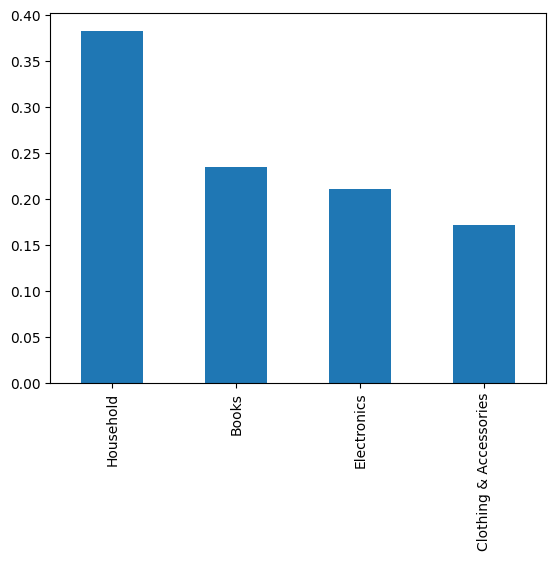

In [54]:
data['label'].value_counts(normalize = True).plot.bar()